# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

1. Importar librerías pandas y numpy y de la librería matloplib importar pyplot. 
2. Cargar los archivos al notebook usando pd.read_csv().
3. Revisar la información de cada una de ellas con el método info()
4. Contar valores ausentes de las columna correspondientes con isna() y sum().
4. Visualizar las primeras filas de las tablas con head(). 

In [16]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [51]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv('C:\Downloads\instacart_orders.csv', sep=';')
products = pd.read_csv('C:\Downloads\products.csv', sep=';')
order_products = pd.read_csv('C:\Downloads\order_products_excel.csv', sep=';')
aisles = pd.read_csv('C:\Downloads\aisles.csv', sep=';')
departments = pd.read_csv('C:\Downloads\departments.csv', sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Downloads\\instacart_orders.csv'

In [ ]:
# mostrar información del DataFrame instacart_orders
instacart_orders.info()
print()
print('Valores ausentes en days_since_prior_order:', instacart_orders['days_since_prior_order'].isna().sum())
print()
instacart_orders.head()

In [ ]:
# mostrar información del DataFrame products
products.info()
print()
print('Valores ausentes en product_name:', products['product_name'].isna().sum())
print()
products.head()

In [ ]:
# mostrar información del DataFrame order_products
order_products.info(show_counts=True)
print()
print('Valores ausentes en add_to_cart_order:', order_products['add_to_cart_order'].isna().sum())
order_products.head()


In [ ]:
# mostrar información del DataFrame aisles
aisles.info()
print()
aisles.head()


In [ ]:
# mostrar información del DataFrame departments
departments.info()
print()
departments.head()

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Al leer la información de los DataFrames ya cargados, observamos que hay datos ausentes en tres de las cinco tablas:

1. instacart_orders: 28819/478967 NaN en columna 'days_since_prior_order' 
2. products: 1258/19694 NaN en columna 'product_name'
3. order_products: 836/4545007 NaN en columna 'add_to_cart_order'

Los datos de los DataFrames 'aisle' y 'departments' están completos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Eliminar duplicados: 
1. En las columnas que corresponda, pasar todo a minúscula con str.lower()
2. Revisar si hay duplicados exactos con duplicated() y sum()
3. Revisar datos en común de datos duplicados. 
4. Eliminar los duplicados exactos con drop_duplicates()

Corregir datos DataFrames 'instacart_orders' y 'order_products' 
1. Revisar columnas days_since_prior order y add_to_cart_order.
2. De ser necesario, revisar si es que se pierden datos al modificar columnas con np.array_equal()
3. Decidir si cambiar o no el tipo de datos de dichas columna. 

Valores ausentes: 
1. Llamar a las filas con valores ausentes con filtrado e isna().
2. Revisar si tienen elementos en común. 
3. Reemplazar los valores ausentes con fillna() o eliminar filas con dropna(), dependiendo de los hallazgos encontrados. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [ ]:
# Revisa si hay pedidos duplicados
print(instacart_orders.duplicated().sum())
print()
print(instacart_orders[instacart_orders.duplicated()==True])

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Respuesta: todos los duplicados sucedieron el día miércoles a las 2AM.

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders.query('order_dow == 3 and order_hour_of_day == 2'))

¿Qué sugiere este resultado? RESPUESTA: Este resultado sugiere que el error en la toma de datos fue solamente en un día puntual, ya que los valores duplicados para el miércoles a las 2AM son solo 15 de los 121 pedidos en totales para ese día a la misma hora. 

In [10]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)
#np.array_equal(instacart_orders['days_since_prior_order'], instacart_orders['days_since_prior_order'].astype('int'))

In [14]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())

NameError: name 'instacart_orders' is not defined

In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(instacart_orders[instacart_orders['order_id'].duplicated() == True])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos
Descripción:
Al revisar los datos duplicados del DataFrame, nos dimos cuenta que estas filas corresponden a datos recopilados el día miércoles a las 2am. Esto puede haber sucedido debido a algún error del sistema en ese momento en específico. 
Luego de mirar esos datos, se eliminó la data duplicada y se verificó que no hayan celdas duplicadas en la columna order_id. 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [14]:
# Verifica si hay IDs duplicadas de productos
products['product_id'].duplicated().sum()

0

In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products['product_name'].duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~(products['product_name'].isna()) & (products['product_name'].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos. RESPUESTA: Al buscar duplicados exactos en la tabla 'products' el resultado es 0, por lo que se procede a buscar por NaN con un resultado de 1361 en la columna de 'product_name'. Para saber si es que hay duplicados que no sean valores nulos, se realiza el filtro correspondiente. El resultado de este filtro arroja 104 filas con productos de nombres repetidos. Como conclusión, podemos decir que se pueden trabajar con todos los datos de la tabla, ya que si bien hay alcances de nombre entre producto esto se puede deber a que son de distos departamente/categorías o son nuevas versiones. 

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [18]:
# Revisa si hay IDs duplicadas de productos
departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Respuesta: se revisaron duplicados de filas completas en el dataset y duplicados de id. Ambos resultados fueron de 0, por lo que la tabla está lista para el análisis. 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [20]:
# Revisa si hay IDs duplicadas de productos
aisles['aisle_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
RESPUESTA: se revisaron duplicados de filas completas en el dataset y duplicados de id. Ambos resultados fueron de 0, por lo que la tabla está lista para el análisis. 

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[['order_id', 'product_id']].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos. RESPUESTA: Se buscaron duplicados exactos en la tabla al igual que duplicados al filtrar por 'order_id' y 'product_id', ambas resultados fueron de 0. Es decir, la tabla está lista para ser utilizada en el análisis.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
RESPUESTA: al filtrar la tabla por los valores ausentes en la columna 'product_name', vemos un denominador común tanto en 'aisle_id' como 'department_id'

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
filtered_df = (products[products['product_name'].isna()])
print(filtered_df['aisle_id'].value_counts())

100    1258
Name: aisle_id, dtype: int64


Describe brevemente cuáles son tus hallazgos.
RESPUESTA: Al aplicar .values_counts() podemos dar cuenta que los valores ausentes provienen únicamente del pasillo 100 

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
filtered_df = (products[products['product_name'].isna()])
print(filtered_df['department_id'].value_counts())

21    1258
Name: department_id, dtype: int64


Describe brevemente cuáles son tus hallazgos.
RESPUESTA: con el método .value_counts() notamos que todos los NaN pertenecen al departamento 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

#crear dataframe para filas con pasillo 10 y departamento 21
aisle_and_department = products.query('aisle_id == 100 and department_id ==21')
#mostrar datraframe aisle_and_department
print(aisle_and_department)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [27]:
#buscar valores presentes en el dataframe por 'product_name' con distintos métodos
print('value_counts:', aisle_and_department['product_name'].value_counts())
print()
print('unique:', aisle_and_department['product_name'].unique())
print()
#verificar cantidad de valores ausentes
print('isna:', aisle_and_department['product_name'].isna().sum())



value_counts: Series([], Name: product_name, dtype: int64)

unique: [nan]

isna: 1258


In [28]:
#verificar si los valores ausentes del dataframe 'products' es la misma que la del dataframe 'aisle_and department'
print('NaN en products:', products.isna().sum())

NaN en products: product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.
RESPUESTA: al utilizar distintos métodos, confirmamos que todos los valores ausentes del DataFrame 'products' corresponden a celdas vacías en 'product_name' provenientes del pasillo 100, departamento 21.

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print(products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.
RESPUESTA: Al saber que los valores ausentes del DataFrame product vienen del mismo departamento y pasillo, se cambia el NaN por 'Unknown', para no tener órdenes con datos faltantes. 
Lo más probable es que la persona encargada se haya olvidado de subir los nombres.
Con info() se verifica que products ya no cuenta con valores ausentes. 


### `orders` data frame

In [30]:
# Encuentra los valores ausentes

#Buscar dónde están los valores ausentes en el dataframe
print(instacart_orders.isna().sum())
print()
#mostrar filas con valores ausentes
print(instacart_orders[instacart_orders['days_since_prior_order'].isna()])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4              

In [31]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

#crear filtro para mostrar filas con valores ausentes en 'days_since_prior_order'
orders_filter_prior_order = instacart_orders[instacart_orders['days_since_prior_order'].isna()]
#mostrar número de orden donde hay NaN
print(orders_filter_prior_order['order_number'].value_counts())

1    28817
Name: order_number, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
RESPUESTA: Al encontrar la columna dónde habían valores ausentes en el DataFrame 'instacart_orders', se verificó que ocurrían porque se trataban del primer pedido del cliente. Para llegar a esta conclusión se utilizó value_counts() sobre la columna 'order_number' de las filas con NaN

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes

#Buscar columnas con NaN
print(order_products.isna().sum())
#Mostrar filas con NaN en 'add_to_cart_order'
print(order_products['add_to_cart_order'].isna())


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Name: add_to_cart_order, Length: 4545007, dtype: bool


In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor mínimo:', order_products['add_to_cart_order'].min())
print('Valor máximo:', order_products['add_to_cart_order'].max())

Valor mínimo: 1.0
Valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.
RESPUESTA: No hay pedidos con una venta mayor a 64 productos. Los NaN presentes no corresponden a errores con el primer ítem porque el mínimo 1 sí fue contado.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_with_nan = order_products[order_products['add_to_cart_order'].isna()]
print(order_id_with_nan)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [1]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print(order_id_with_nan['order_id'].value_counts())

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
grouped_by_order_id = order_id_with_nan.groupby('order_id')

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print('Cantidad de productos por orden:\n',grouped_by_order_id['product_id'].count())
print()
print('Compra mínima de items:', grouped_by_order_id['product_id'].count().min())

NameError: name 'order_id_with_nan' is not defined

Describe brevemente cuáles son tus hallazgos.
RESPUESTAS: se revisan las filas con NaN y se cuenta la cantidad de items por contra. Al mirar la data, nos damos cuenta que los NaN son independientes al número de productos comprados. Hay que seguir analizando el error.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

Describe brevemente tus hallazgos y lo que hiciste con ellos.
RESPUESTA: Al no encontrarse algún patrón sobre la presencia de NaN en el dataset, se cambian los valores ausentes por 999. A continuación se cambia el tipo de dato de la columna 'add_to_cart_order' de float a entero. 

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
RESPUESTA: Se realiza el preprocesamiento de datos a los cinco Dataframes. El trabajar con la data nos permite ver que los dataframe aisle y departments vienen listos para realizar análisis sobre ellos. En los otros tres dataset se eliminan duplicados explicitos y se revisan los NaN presentes. Al mirar detalladamente a las filas con valores ausentes en el DataFrames de ordenes, podemos notar que faltó cargar la información de aquellos productos pertenecientes al departamento 21-pasillo 100. Para no perder la información de otras columnas en los dataframes con NaN, se reemplazan estos valores por otros pertinentes y que reflejen que la información no estaba presente. 



# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
#verificar valores hora 
instacart_orders['order_hour_of_day'].value_counts().sort_index()

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [38]:
#verificar valores día
instacart_orders['order_dow'].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

Escribe aquí tus conclusiones. RESPUESTA: Se utiliza value_counts() y sort_index() para verificar los valores presentes en las columnas order_hour_of_day y order_dow. Se comprueba que no hay ningún dato anómalo. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [39]:
#filtrar información
orders_by_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].nunique()
orders_by_hour

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64

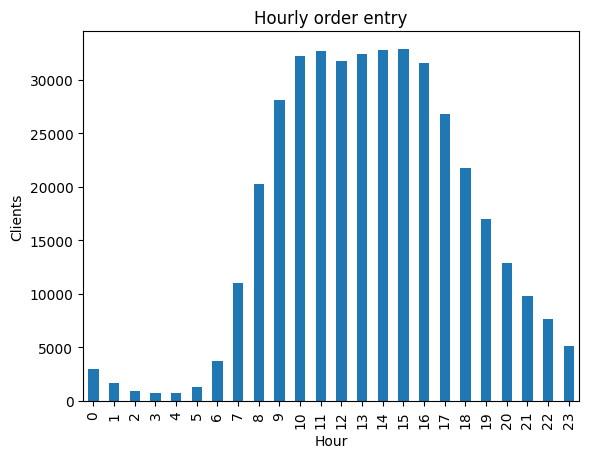

In [40]:
#graficar resultados
orders_by_hour.plot(kind='bar',
                   xlabel='Hour',
                   ylabel='Clients',
                   title='Hourly order entry')

plt.show()

Escribe aquí tus conclusiones. RESPUESTA: las horas del día con más compras son los horario entre 10 y 16, siendo las 15PM el peak de compras. 

### [A3] ¿Qué día de la semana compran víveres las personas?

In [41]:
#filtrar información
orders_by_day = instacart_orders.groupby('order_dow')['order_id'].count()
orders_by_day

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64

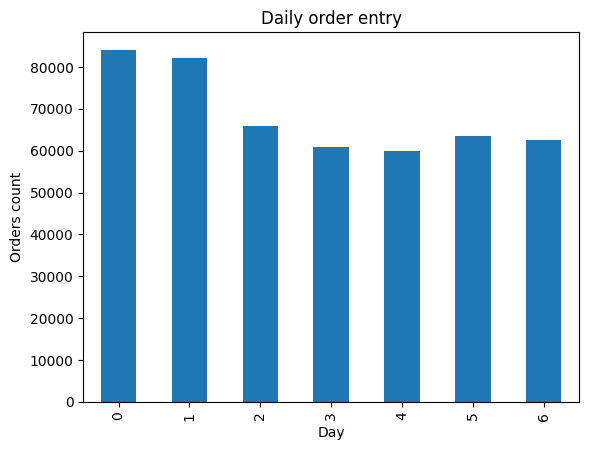

In [42]:
#graficar información 
orders_by_day.plot(kind='bar',
                  xlabel='Day',
                  ylabel='Orders count',
                  title='Daily order entry')

plt.show()

Escribe aquí tus conclusiones. RESPUESTA: El mejor día de ventas es el Domingo seguido por el día Lunes. Miércoles y Jueves son los días de la semana donde menos se vende. 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [43]:
#filtrar información
days_since_prior_order = instacart_orders.groupby('days_since_prior_order')['order_id'].count()
days_since_prior_order.sort_values()

days_since_prior_order
26.0     2640
29.0     2673
25.0     2711
27.0     2986
24.0     3015
23.0     3337
28.0     3745
22.0     4514
19.0     4939
18.0     4971
20.0     5302
17.0     5498
21.0     6448
16.0     6587
15.0     9416
0.0      9589
12.0    10658
11.0    11467
13.0    11737
10.0    13309
14.0    13992
9.0     16753
1.0     20179
8.0     25361
2.0     27138
5.0     30096
3.0     30224
4.0     31006
6.0     33930
7.0     44577
30.0    51337
Name: order_id, dtype: int64

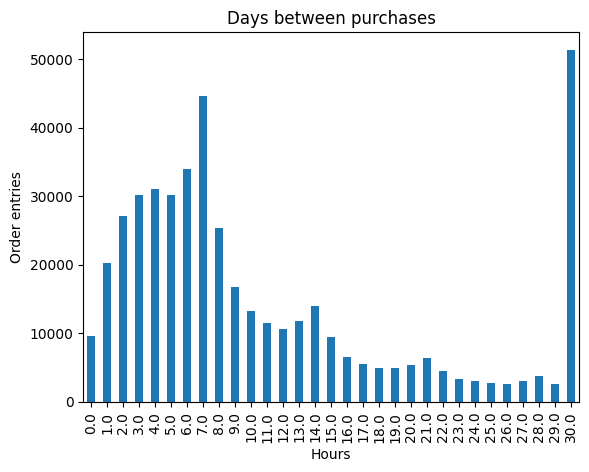

In [44]:
#graficar información 
days_since_prior_order.plot(kind='bar',
                          xlabel='Hours',
                          ylabel='Order entries',
                          title='Days between purchases')

plt.show()

Escribe aquí tus conclusiones. RESPUESTA: La mayor cantidad de día que esperan las personas para volver a comprar son 30 y el mínimo 26. Puede inferirse que las familias tienden a realizar una compra para todo el mes. Necesitamos más información para saber las fechas de estos datos, de esa manera confirmar que estos movimientos tienen relación con las fechas de pago de cada persona.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [45]:
# filtrar información para crear gráfico por hora del día

#datos miércoles
wed_orders = instacart_orders[instacart_orders['order_dow'] == 3]
wed_hour_orders = wed_orders['order_hour_of_day'].value_counts().sort_index()

#datos sábado
sat_orders = instacart_orders[instacart_orders['order_dow'] == 6]
sat_hours_orders = sat_orders['order_hour_of_day'].value_counts().sort_index()

#unión gráficos. 
wed_sat_orders = pd.concat([wed_hour_orders, sat_hours_orders], axis='columns')
print(wed_sat_orders)

    order_hour_of_day  order_hour_of_day
0                 373                464
1                 215                254
2                 106                177
3                 101                125
4                 108                118
5                 170                161
6                 643                451
7                1732               1619
8                3125               3246
9                4490               4311
10               5026               4919
11               5004               5116
12               4688               5132
13               4674               5323
14               4774               5375
15               5163               5188
16               4976               5029
17               4175               4295
18               3463               3338
19               2652               2610
20               1917               1847
21               1450               1473
22               1154               1185
23              

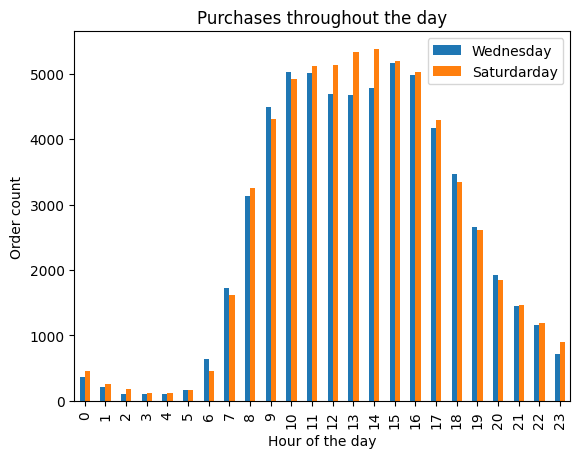

In [46]:
#gráfico día miércoles

wed_sat_orders.plot(kind='bar',
                   xlabel='Hour of the day',
                   ylabel='Order count',
                   legend=False,
                   title='Purchases throughout the day')

plt.legend(['Wednesday', 'Saturdarday'])
plt.show()

Escribe aquí tus conclusiones.
RESPUESTA: al graficar las compras realizadas en cada hora del día para ambos días, podemos notar que durante miércoles y sábados la cantidad de órdenes realizas son mayormente similares. Las diferencia se puede notar entre las 12 y 14 horas, en este rango horario las compras del sábado son mayores a las del miércoles.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
# filtrar información para crear gráfico número de compras

#agrupar datos por user_id y contar números de co
num_orders = instacart_orders.groupby('user_id')['order_id'].count()
             
              
num_orders

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64

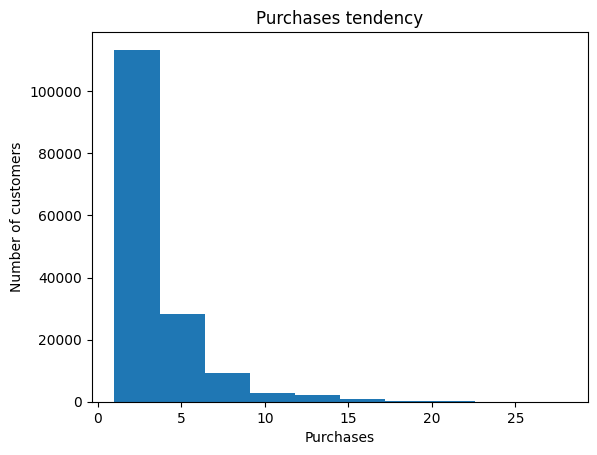

In [48]:
#gráfico frecuencia número de compras
num_orders.plot(title='Purchases tendency',
               kind='hist')
               
            
plt.ylabel('Number of customers')
plt.xlabel('Purchases')
plt.show()        

Escribe aquí tus conclusiones. RESPUESTA: al revisar detalladamente el gráfico que muestra la frecuencia de compras por cliente, nos damos cuenta que la mayoría realiza entre 1 a 100 compras. Sería importante revisar las fechas de las órdenes para indagar esta tendencia.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
products_order_id = order_products[['order_id', 'product_id']]
product_identification = products[['product_id', 'product_name']]


In [50]:
#unir tablas filtradas de order_products y products
product_id_name = products_order_id.merge(product_identification, on='product_id')
product_id_name


,order_id,product_id,product_name
0,2141543,11440,CHICKEN BREAST TENDERS BREADED
1,147172,11440,CHICKEN BREAST TENDERS BREADED
2,3341719,11440,CHICKEN BREAST TENDERS BREADED
3,1938779,11440,CHICKEN BREAST TENDERS BREADED
4,1728338,11440,CHICKEN BREAST TENDERS BREADED
...,...,...,...
4545002,267402,45226,SWEET TERIYAKI CHICKEN OVEN SAUCE
4545003,2621676,25201,CRISP WATERS CANDLE SCENTS
4545004,937623,49153,SHINE COLLECTION BRILLANCE SHAMPOO
4545005,532895,8182,TOTAL MINT STRIPE GEL TOOTHPASTE


In [51]:
grouped_df = (product_id_name
              .groupby(['product_id', 'product_name'])
              .count()
              .sort_values(by='order_id', ascending=False)
              .head(20)
             .rename(columns = {'order_id': 'num_purchases'})
             .reset_index())
grouped_df

,product_id,product_name,num_purchases
0,24852,BANANA,66050
1,13176,BAG OF ORGANIC BANANAS,53297
2,21137,ORGANIC STRAWBERRIES,37039
3,21903,ORGANIC BABY SPINACH,33971
4,47209,ORGANIC HASS AVOCADO,29773
5,47766,ORGANIC AVOCADO,24689
6,47626,LARGE LEMON,21495
7,16797,STRAWBERRIES,20018
8,26209,LIMES,19690
9,27845,ORGANIC WHOLE MILK,19600


Escribe aquí tus conclusiones
RESPUESTA: Se realizó un filtrado por columnas a los DataFrames 'order_products' y 'products' para fusionar ambos resultados por la columna con el id de cada producto. A dicha tabla se re aplicaron distintos métodos una vez agrupada. Como resultado, podemos dar cuenta que los productos más solicitados son aquellos pertenecientes al grupo de frutas y verduras, especialmente orgánicas.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
#agrupar datos para crear gráfico
num_items_per_purchase = order_products.groupby('order_id')['product_id'].count()
                                
num_items_per_purchase      


order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

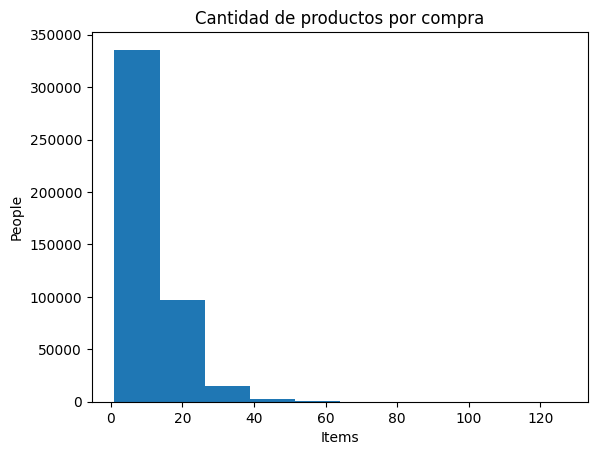

In [53]:
#crear histograma
num_items_per_purchase.plot(kind='hist',                            
                            title='Cantidad de productos por compra'
                            )

plt.xlabel('Items')
plt.ylabel('People')
plt.show()

Escribe aquí tus conclusiones, RESPUESTA: Las compras más comunes son de entre 1 y 15 productos, las cuales han sido hechas por al menos 340mil clientes. Seguidas por compras de entre 15 y y 20 productos realizadas por al menos 90mil personas. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [54]:
#filtrar tablas por columnas con información necesaria

product_identification = products[['product_id', 'product_name']]
order_products_short = order_products[['product_id', 'reordered']]

#mostrar tablas creadas

print(product_identification)
print()
print(order_products_short)


       product_id                                       product_name
0               1                         CHOCOLATE SANDWICH COOKIES
1               2                                   ALL-SEASONS SALT
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4               5                          GREEN CHILE ANYTIME SAUCE
...           ...                                                ...
49689       49690                      HIGH PERFORMANCE ENERGY DRINK
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692       49693                             SPRING WATER BODY WASH
49693       49694                            BURRITO- STEAK & CHEESE

[49694 rows x 2 columns]

         product_id  reordered
0             11440          0
1              1560          1
2             26683          1
3              8670  

In [55]:
#unir tablas creadas 

products_reordered_info = product_identification.merge(order_products_short, on='product_id')
products_reordered_info

,product_id,product_name,reordered
0,1,CHOCOLATE SANDWICH COOKIES,1
1,1,CHOCOLATE SANDWICH COOKIES,1
2,1,CHOCOLATE SANDWICH COOKIES,0
3,1,CHOCOLATE SANDWICH COOKIES,1
4,1,CHOCOLATE SANDWICH COOKIES,0
...,...,...,...
4545002,49694,BURRITO- STEAK & CHEESE,0
4545003,49694,BURRITO- STEAK & CHEESE,0
4545004,49694,BURRITO- STEAK & CHEESE,0
4545005,49694,BURRITO- STEAK & CHEESE,0


In [56]:
#obtener 20 productos que se repiten con mayor frecuencia

products_reordered_info_grouped = (products_reordered_info.groupby(['product_id', 'product_name'])
                                   .sum()
                                  .sort_values(by='reordered', ascending=False)
                                  .head(20)                                  
                                  .reset_index())
                                
products_reordered_info_grouped                               



,product_id,product_name,reordered
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


Escribe aquí tus conclusiones. RESPUESTA: Los productos que se vuelven a comprar con más frecuencia nuevamente son los pertenecientes a grutas y verduras, especialmente orgánicos. Esto puede deberse a que se tratan de alimentos perecibles, por lo que se consumen más rápido ya que su duración es corta.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
#cálculo pedidos totales 

total_orders = (order_products.groupby('product_id')['reordered']
                  .count()
                  .reset_index()
                  .rename(columns= {'reordered': 'total_purchases'}))
total_orders

,product_id,total_purchases
0,1,280
1,2,11
2,3,42
3,4,49
4,7,2
...,...,...
45568,49690,5
45569,49691,72
45570,49692,12
45571,49693,25


In [58]:
#tabla con cálculo veces que se pide un producto

products_first_time = order_products[['product_id', 'reordered']]
products_first_time = products_first_time.query('reordered == 0')
products_first_time_grouped = (products_first_time.groupby('product_id')
                             .count()
                             .reset_index()
                             .rename(columns = {'reordered': 'first_time_purchases'}))
                              

    
products_first_time_grouped['first_time_purchases'] = pd.to_numeric(products_first_time_grouped['first_time_purchases'])
products_first_time_grouped


,product_id,first_time_purchases
0,1,122
1,2,11
2,3,11
3,4,24
4,7,1
...,...,...
43759,49690,1
43760,49691,41
43761,49692,7
43762,49693,14


In [59]:
#tabla con cálculo veces que se repite la compra un producto

products_repeated = order_products[['product_id', 'reordered']]
products_repeated = products_repeated.query('reordered == 1')
products_repeated_grouped = (products_repeated.groupby('product_id')
                             .count()
                            .reset_index())            
    
                             
products_repeated_grouped['reordered'] = pd.to_numeric(products_repeated_grouped['reordered'])
products_repeated_grouped

,product_id,reordered
0,1,158
1,3,31
2,4,25
3,7,1
4,8,6
...,...,...
36223,49690,4
36224,49691,31
36225,49692,5
36226,49693,11


In [60]:
#unión de todas las tablas

products_proportions = (products_first_time_grouped
                        .merge(products_repeated_grouped, on='product_id', how='outer'))
products_proportions = products_proportions.merge(total_orders, on='product_id')
products_proportions

,product_id,first_time_purchases,reordered,total_purchases
0,1,122.0,158.0,280
1,2,11.0,NaN,11
2,3,11.0,31.0,42
3,4,24.0,25.0,49
4,7,1.0,1.0,2
...,...,...,...,...
45568,49625,NaN,1.0,1
45569,49639,NaN,1.0,1
45570,49657,NaN,1.0,1
45571,49661,NaN,1.0,1


In [61]:
#rellenar NaN en tabla products proportion
products_proportions.fillna(0, inplace=True)
products_proportions

,product_id,first_time_purchases,reordered,total_purchases
0,1,122.0,158.0,280
1,2,11.0,0.0,11
2,3,11.0,31.0,42
3,4,24.0,25.0,49
4,7,1.0,1.0,2
...,...,...,...,...
45568,49625,0.0,1.0,1
45569,49639,0.0,1.0,1
45570,49657,0.0,1.0,1
45571,49661,0.0,1.0,1


In [62]:
#agregar columnas con cálculos de proporciones 

#creación columna proporción veces que se pide por primera vez
products_proportions['first_times_percentage'] = products_proportions['first_time_purchases'] / products_proportions['total_purchases'] * 100

#creación columna proporción veces que se repite compra de producto
products_proportions['reordered_proportion'] = products_proportions['reordered'] / products_proportions['total_purchases'] * 100

products_proportions

,product_id,first_time_purchases,reordered,total_purchases,first_times_percentage,reordered_proportion
0,1,122.0,158.0,280,43.571429,56.428571
1,2,11.0,0.0,11,100.000000,0.000000
2,3,11.0,31.0,42,26.190476,73.809524
3,4,24.0,25.0,49,48.979592,51.020408
4,7,1.0,1.0,2,50.000000,50.000000
...,...,...,...,...,...,...
45568,49625,0.0,1.0,1,0.000000,100.000000
45569,49639,0.0,1.0,1,0.000000,100.000000
45570,49657,0.0,1.0,1,0.000000,100.000000
45571,49661,0.0,1.0,1,0.000000,100.000000


Escribe aquí tus conclusiones. RESPUESTA: se filtró la tabla de 'order_products' para poder contabilizar las veces que un producto se pidió por primera vez y la cantidad de veces que se repitió su compra. Además, se filtro la tabla para sacar el total de compras por producto. Al combinar todas las celdas se agregaron dos columnas extras con los datos de proporciones en cada tipo de compra (primera, vuelto a comprar) 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [63]:
#cálculo productos totales por orden

order_total_products = (order_products.groupby('order_id')['reordered']
                  .count()
                  .reset_index()
                  .rename(columns= {'reordered': 'total_items'}))
order_total_products

,order_id,total_items
0,4,13
1,9,15
2,11,5
3,19,3
4,20,8
...,...,...
450041,3421034,17
450042,3421053,9
450043,3421071,5
450044,3421077,4


In [64]:
#filtrar tabla para sacar info de clientes
users = instacart_orders[['user_id','order_id']]
#revisar por duplicados exactos de usuario y orden
print(users[['user_id', 'order_id']].duplicated().sum())
users

0


,user_id,order_id
0,183418,1515936
1,163593,1690866
2,39980,1454967
3,82516,1768857
4,196724,3007858
...,...,...
478947,5617,3210681
478948,112087,3270802
478949,82944,885349
478950,4391,216274


In [65]:
#filtrar tabla para sacar información productos
orders = order_products[['order_id', 'reordered']]
#calcular número de productos repetidos por orden
orders = orders.groupby('order_id')['reordered'].sum().reset_index()
orders

,order_id,reordered
0,4,12
1,9,10
2,11,5
3,19,3
4,20,0
...,...,...
450041,3421034,17
450042,3421053,9
450043,3421071,1
450044,3421077,0


In [66]:
#combinar tabla de users y orders
user_orders = users.merge(orders, on='order_id')
#agregar columna de compras totales 
user_orders = user_orders.merge(order_total_products, on='order_id')
user_orders

,user_id,order_id,reordered,total_items
0,183418,1515936,7,13
1,163593,1690866,3,6
2,39980,1454967,0,6
3,82516,1768857,11,16
4,196724,3007858,11,27
...,...,...,...,...
450041,5617,3210681,4,6
450042,112087,3270802,2,9
450043,82944,885349,7,14
450044,4391,216274,7,7


In [67]:
#calcular productos reordenados por cliente
user_products_reordered = user_orders.groupby('user_id')[['reordered', 'total_items']].sum().reset_index()
user_products_reordered 

,user_id,reordered,total_items
0,2,1,26
1,4,0,2
2,5,8,12
3,6,0,4
4,7,13,14
...,...,...,...
149621,206203,6,27
149622,206206,15,21
149623,206207,41,46
149624,206208,87,125


In [68]:
#añadir columna nueva a user_products_reordered con cálculo de proporción 
user_products_reordered['pct_reordered_items'] = user_products_reordered['reordered'] / user_products_reordered['total_items'] * 100

user_products_reordered

,user_id,reordered,total_items,pct_reordered_items
0,2,1,26,3.846154
1,4,0,2,0.000000
2,5,8,12,66.666667
3,6,0,4,0.000000
4,7,13,14,92.857143
...,...,...,...,...
149621,206203,6,27,22.222222
149622,206206,15,21,71.428571
149623,206207,41,46,89.130435
149624,206208,87,125,69.600000


Escribe aquí tus conclusiones. RESPUESTA: Se filtraron las tablas de order_products e instacart_orders para obtener las columnas útiles a procesar. Una vez combinadas las columnas filtradas junto con la columna con el valor de productos totales por usuario, se crea una columna nueva que contiene la proporción de productos reordenados. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [69]:
 #crear tabla con conteo de productos agregados al inicio de la compra
first_items = (order_products[order_products['add_to_cart_order'] == 1 ]
                .groupby('product_id')['add_to_cart_order']
                .count()
                .sort_values(ascending=False)
                .reset_index()
                .rename(columns={'add_to_cart_order': 'first_additon'}))
 
#filtrar tabla con id y nombre de producto    
items_names = products[['product_id', 'product_name']]

#crear tabla con identificación de productos (id, nombre) y conteo de veces agregados primero a la compra
first_items_identification = first_items.merge(items_names, on='product_id')


In [70]:
#mostrar 20 productos que se añaden primero a una compra 
first_items_identification.head(20)


,product_id,first_additon,product_name
0,24852,15562,BANANA
1,13176,11026,BAG OF ORGANIC BANANAS
2,27845,4363,ORGANIC WHOLE MILK
3,21137,3946,ORGANIC STRAWBERRIES
4,47209,3390,ORGANIC HASS AVOCADO
5,21903,3336,ORGANIC BABY SPINACH
6,47766,3044,ORGANIC AVOCADO
7,19660,2336,SPRING WATER
8,16797,2308,STRAWBERRIES
9,27966,2024,ORGANIC RASPBERRIES


Escribe aquí tus conclusiones. RESPUESTA: primero se filtró la tabla order_products, luego se agrupó y aplicaron los métodos para obtener los productos más populares en agrega por primera vez a una compra. A continuación, se sombino con las columnas filtradas del dataset products para saber los nombres de dichos productos. Al analizar la tabla final, podemos dar cuentas que los productos que primero que añaden a una compra son las frutas y verduras orgánicas. 

### Conclusion general del proyecto:

Para analizar los datos de Instacart, primero se descargaron las librerías pertinentes y se realizó una descripción exploratoria para cada dataset. Para esto, se utilizó el método info(), se buscaron ausentes y se mostraron las primeras filas con head(). Este paso se realizó para  guiar el preprocesamiento de datos.
Para la segunda parte, el preprocesamiento, en cada dataset se buscó por duplicados exactos y valores ausentes. Al revisar esta información, concluimos que las tablas ‘departments’ y ‘aisle’ estaban listas para ser usadas. En las otra tablas se eliminan duplicados exactos y se realizan los siguientes descubrimientos: 
1. ‘Instacart_orders’: hubo un bug un miércoles a las 2AM.
2. ‘Product’: faltan nombres de productos pertenecientes al departamento 21, pasillo 100, se reemplazan los NaN por 'Unknown'.
3. 'Order_product': se reemplazan valores ausente de 'add_to_cart_order' por 999. 

Para finalizar, respondemos las preguntas de análisis donde se obtienenlos siguientes resultados: 
1. La hora peak de compras por cliente es a las 15PM.
2. Los días favoritos para comprar son domingo y sábado.
3. La mayoría de las personas esperan 30 días entre compra y compra. 
4. La cantidad de compras entre miércoles y sábado son similares durante el transcurso de cada día. Excepto entre 12PM Y 14PM donde se realizan más compras los sábados. 
5. La mayoría de los clientes realiza entre 1 y 100 compras. 
6. Usualmente hay entre 1 y 15 productos por orden de compra.  
7. Los productos más populares, que se piden con mayor frecuencia y se vuelven a comprar más seguido son las frutas y verduras orgánicas.

Se pueden seguir explorando los datos para analizar relaciones entre la proporción de las veces que se pide y que se vuelve a pedir cada producto o el producto más repetido de cada usuario. 
